In [2]:
pip install datasets pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 45.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from datasets import load_dataset

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DATA SET FROM HUGGING FACE

In [11]:
ds = load_dataset("rjac/all-the-news-2-1-Component-one")

In [12]:
#filter out samples with empty articles
filtered = ds["train"].filter(
    lambda x: x["article"] is not None and x["article"].strip() != ""
)

#filter out samples with empty sections
filtered = filtered.filter(lambda x: x["section"] is not None and x["section"].strip() != "")

Filter: 100%|██████████| 2583614/2583614 [02:18<00:00, 18651.48 examples/s]


In [37]:
from collections import Counter

#look the top topic sections 
section_counts = Counter(filtered["section"])
for section, count in section_counts.most_common(50):
    print(f"{section}: {count}")

World News: 108650
Market News: 106251
Business News: 96390
Wires: 66013
Financials: 55391
politics: 53180
us: 51149
Intel: 39803
Bonds News: 35165
Politics: 33870
Healthcare: 30803
world: 28412
opinion: 27463
Sports News: 26324
Consumer Goods and Retail: 26297
business: 25223
tv: 24608
sports: 23904
Tech: 21594
arts: 21230
movies: 19615
Commodities: 17620
Deals: 15847
style: 15321
Tech by VICE: 15220
Entertainment: 13759
health: 13622
nyregion: 13498
Technology News: 12763
Music by VICE: 12413
Environment: 11638
Company News: 11263
Health News: 11235
crime: 11204
Sports: 11110
music: 10363
celebrity: 10211
Food by VICE : 9915
opinions: 9813
entertainment: 9585
Energy: 9175
fashion: 9063
U.S.: 9017
books: 8703
Big Story 10: 7995
magazine: 7864
Noisey: 7695
Funds News: 7587
Cyclical Consumer Goods: 7474
parents: 7056


In [39]:
#im going to choose 15K sample from certain topics for my dataset
topics_to_include = ["world news", "business news","politics", "healthcare", "opinion", "sports news", "tech", "entertainment","fashion", "crime"]

In [40]:
#make section column lowercase
filtered = filtered.map(lambda x: {"section": x["section"].lower()})

# Keep only rows from my chosen topics
filtered = filtered.filter(lambda x: x["section"] in topics_to_include)


Filter: 100%|██████████| 1752878/1752878 [01:01<00:00, 28361.75 examples/s]


,idx,article_idx,date,year,month,day,author,title,article,url,section,publication
0,-15722,-15722,2018-07-31 17:48:00,2018,7.0,31,Beckett Mufson,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,https://www.vice.com/en_us/article/43p4an/rick...,entertainment,Vice
1,12919,12919,2019-06-19 00:00:00,2019,6.0,19,None,China cabinet says will stabilize investment g...,BEIJING (Reuters) - China will stabilise inves...,https://www.reuters.com/article/us-china-econo...,business news,Reuters
2,-14390,-14390,2017-06-20,2017,6.0,20,None,U.S. says Russia not behaving in threatening w...,WASHINGTON (Reuters) - The U.S. military on Tu...,https://www.reuters.com/article/us-mideast-cri...,world news,Reuters
3,-12708,-12708,2017-01-28,2017,1.0,28,None,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,http://www.reuters.com/article/ukraine-crisis-...,world news,Reuters
4,-29661,-29661,2019-08-13,2019,8.0,13,Rodrigo Campos,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,https://www.reuters.com/article/argentina-mark...,business news,Reuters


In [41]:
#take a random sample of 15,000 articles from the filtered dataset
sample = filtered.shuffle(seed=42).select(range(15000))
df = pd.DataFrame(sample)
df.head()

,idx,article_idx,date,year,month,day,author,title,article,url,section,publication
0,-15722,-15722,2018-07-31 17:48:00,2018,7.0,31,Beckett Mufson,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,https://www.vice.com/en_us/article/43p4an/rick...,entertainment,Vice
1,12919,12919,2019-06-19 00:00:00,2019,6.0,19,None,China cabinet says will stabilize investment g...,BEIJING (Reuters) - China will stabilise inves...,https://www.reuters.com/article/us-china-econo...,business news,Reuters
2,-14390,-14390,2017-06-20,2017,6.0,20,None,U.S. says Russia not behaving in threatening w...,WASHINGTON (Reuters) - The U.S. military on Tu...,https://www.reuters.com/article/us-mideast-cri...,world news,Reuters
3,-12708,-12708,2017-01-28,2017,1.0,28,None,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,http://www.reuters.com/article/ukraine-crisis-...,world news,Reuters
4,-29661,-29661,2019-08-13,2019,8.0,13,Rodrigo Campos,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,https://www.reuters.com/article/argentina-mark...,business news,Reuters


In [42]:
#drop idx and article_id columns
df = df.drop(columns=["idx", "article_idx", "date", "month", "day", "author", "url"])
df.head()

,year,title,article,section,publication
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice
1,2019,China cabinet says will stabilize investment g...,BEIJING (Reuters) - China will stabilise inves...,business news,Reuters
2,2017,U.S. says Russia not behaving in threatening w...,WASHINGTON (Reuters) - The U.S. military on Tu...,world news,Reuters
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters


In [43]:
df.shape

(15000, 5)

In [44]:
#save to csv
df.to_csv("/Users/sanjanachintalapudi/Desktop/CU Boulder/NeuralNetworks/all_the_news_sample.csv", index=False)

### Static Dataset and EDA

In [2]:
#read from csv
df = pd.read_csv("/Users/sanjanachintalapudi/Desktop/CU Boulder/NeuralNetworks/all_the_news_sample.csv")
df.head()

,year,title,article,section,publication
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice
1,2019,China cabinet says will stabilize investment g...,BEIJING (Reuters) - China will stabilise inves...,business news,Reuters
2,2017,U.S. says Russia not behaving in threatening w...,WASHINGTON (Reuters) - The U.S. military on Tu...,world news,Reuters
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters


In [3]:
#check for null values
df.isna().sum()

year           0
title          0
article        0
section        0
publication    0
dtype: int64

In [4]:
#check the unique values in the "section" column
df["section"].value_counts()

section
world news       3602
business news    3232
politics         2968
healthcare       1032
opinion           977
sports news       860
tech              841
entertainment     761
crime             440
fashion           287
Name: count, dtype: int64

In [5]:
#reword section column name to topic
df = df.rename(columns={"section": "topic"})
df.head()

,year,title,article,topic,publication
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice
1,2019,China cabinet says will stabilize investment g...,BEIJING (Reuters) - China will stabilise inves...,business news,Reuters
2,2017,U.S. says Russia not behaving in threatening w...,WASHINGTON (Reuters) - The U.S. military on Tu...,world news,Reuters
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters


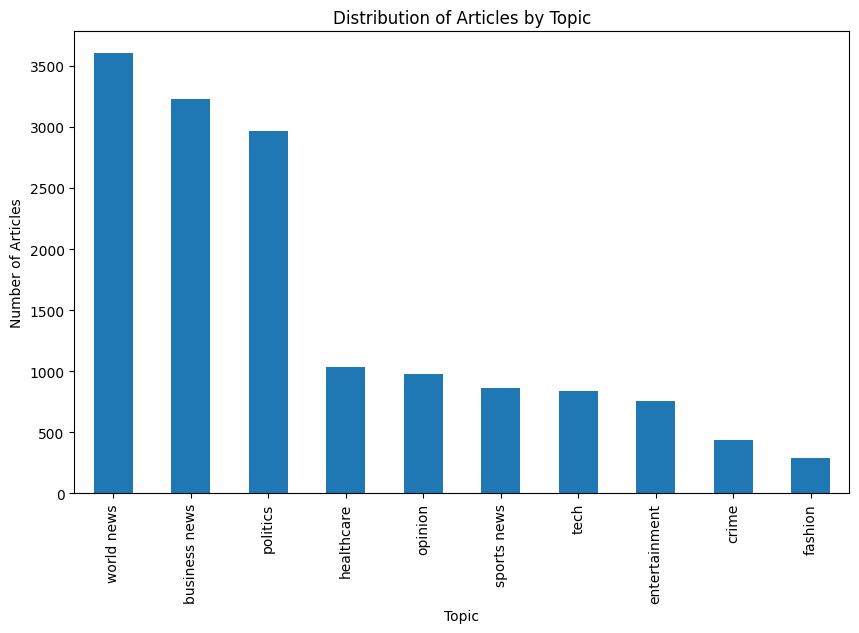

In [6]:
#make topic column into a graph for visualization
import matplotlib.pyplot as plt
topic_counts = df['topic'].value_counts()
plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar')
plt.title('Distribution of Articles by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.show()

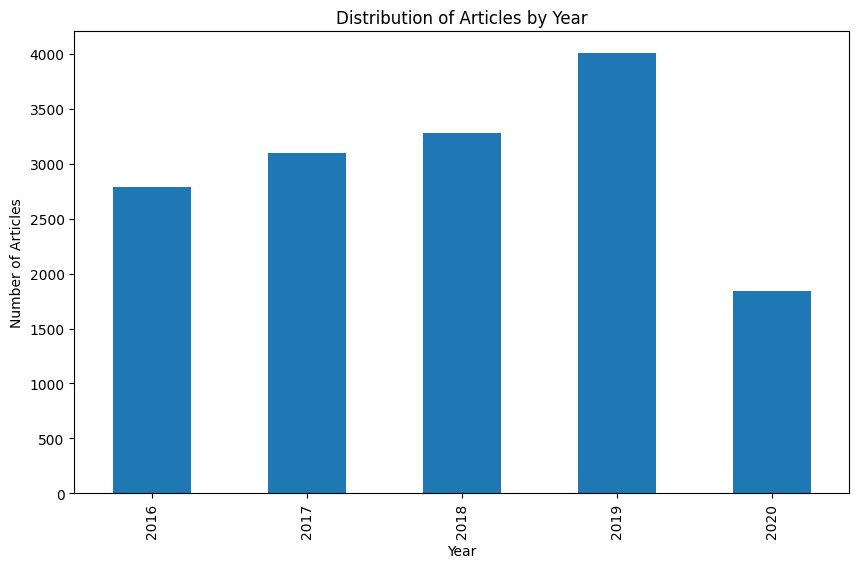

In [7]:
#show article year distribution graph
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Articles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

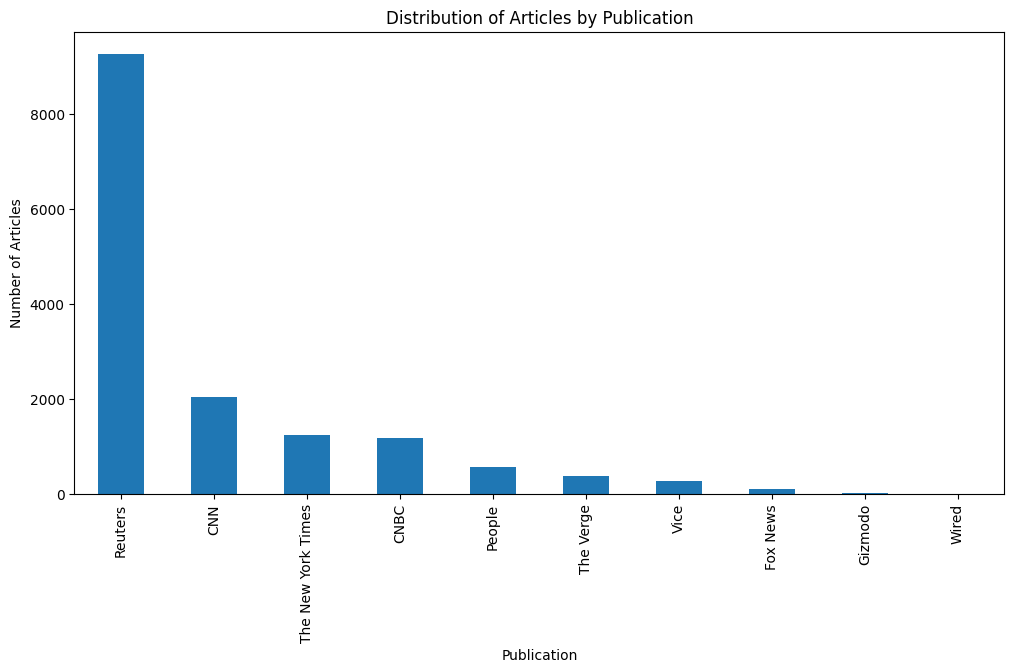

In [8]:
#show publications distribution graph
pub_counts = df['publication'].value_counts()
plt.figure(figsize=(12,6))
pub_counts.plot(kind='bar')
plt.title('Distribution of Articles by Publication')
plt.xlabel('Publication')
plt.ylabel('Number of Articles')
plt.show()

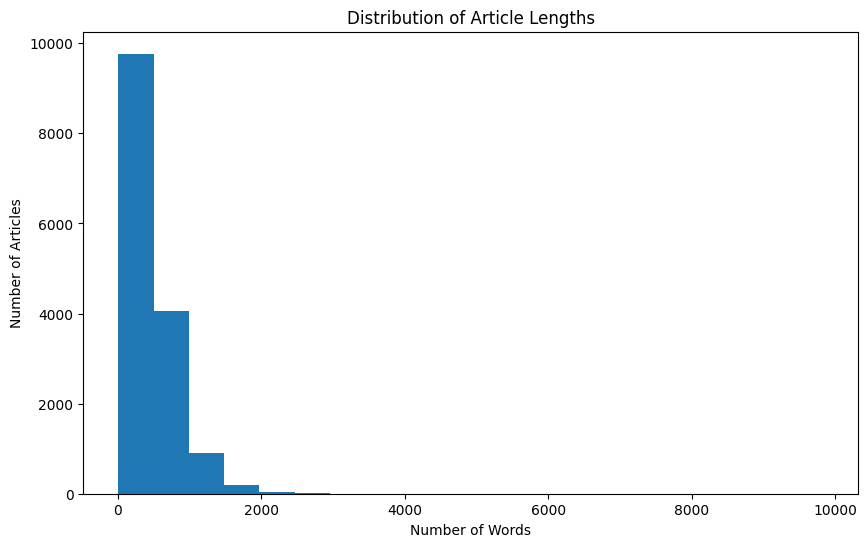

In [9]:
#show article length distribution

#create new column for article length
df['article_length'] = df['article'].apply(lambda x: len(x.split()))

#plot histogram of article lengths
df['article_length'].plot(kind='hist', bins=20, figsize=(10,6))
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.show()

In [11]:
#show min, max, avg article lengths
min_length = df['article_length'].min()
max_length = df['article_length'].max()
avg_length = df['article_length'].mean()
print(f"Minimum article length: {min_length} words")
print(f"Maximum article length: {max_length} words")
print(f"Average article length: {avg_length:.2f} words")

Minimum article length: 9 words
Maximum article length: 9825 words
Average article length: 463.43 words


In [12]:
#since we have extreme outliers in article lengths, we can filter articles between 100 and 2000 words
df = df[(df['article_length'] >= 100) & (df['article_length'] <= 2000)]

df.shape

(13203, 6)

In [13]:
#summary of article lengths after filtering
df["article_length"].describe()

count    13203.000000
mean       503.537984
std        319.110583
min        100.000000
25%        274.000000
50%        423.000000
75%        649.000000
max       1995.000000
Name: article_length, dtype: float64

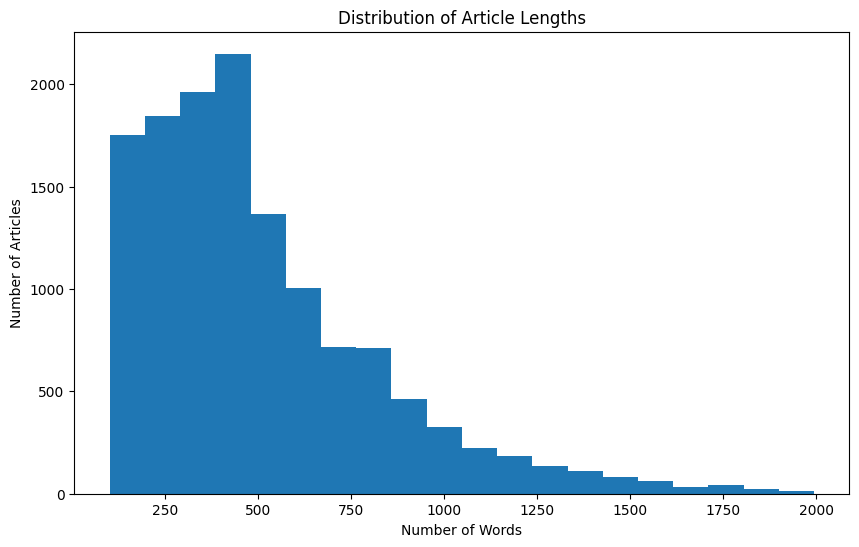

In [172]:
#show article length distribution

#create new column for article length
df['article_length'] = df['article'].apply(lambda x: len(x.split()))

#plot histogram of article lengths
df['article_length'].plot(kind='hist', bins=20, figsize=(10,6))
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.show()

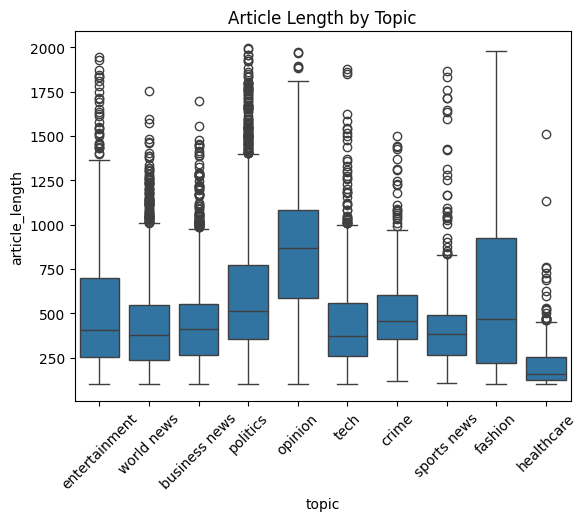

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#boxplot of article lengths by topic
sns.boxplot(data=df, x="topic", y="article_length")
plt.xticks(rotation=45)
plt.title("Article Length by Topic")
plt.show()

#### Gender Classification

In [15]:
import string

In [37]:
#define gendered words in a list

female_words = ["she", "her", "hers", "woman", "women", "female", "girl", "girls", "mother", "mothers",
    "daughter", "daughters", "wife", "wives", "girlfriend", "girlfriends",
    "sister", "sisters", "aunt", "aunts", "grandmother", "grandmothers", "grandma", "herself"]

male_words = ["he", "him", "his", "man", "men", "male", "boy", "boys", "father", "fathers",
    "son", "sons", "husband", "husbands", "boyfriend", "boyfriends",
    "brother", "brothers", "uncle", "uncles", "grandfather", "grandfathers", "grandpa", 
    "himself"]

In [38]:
#define function to count gendered words in article
def count_gendered_words(article):
    # lowercase + remove punctuation
    article = article.lower().translate(str.maketrans('', '', string.punctuation))

    words = article.lower().split()

    female = 0
    male = 0

    for word in words:
        if word in female_words:
            female += 1
        if word in male_words:
            male += 1

    return female, male

In [39]:
#add female_count and male_count columns to dataframe
df["female_count"] = df["article"].apply(lambda x: count_gendered_words(x)[0])
df["male_count"] = df["article"].apply(lambda x: count_gendered_words(x)[1])
df.head()

,year,title,article,topic,publication,article_length,female_count,male_count
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice,406,0,1
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters,131,0,3
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters,463,0,0
6,2016,Watch the first teaser for Tidal's new TV series,The first teaser for Tidal's upcoming TV serie...,entertainment,The Verge,190,0,0
7,2017,Franken calls Trump's 'Pocahontas' remark 'rac...,Washington (CNN)Sen. Al Franken said Sunday Pr...,politics,CNN,217,3,5


In [40]:
#number of articles with zero gendered words
((df["female_count"] == 0) & (df["male_count"] == 0)).sum()

2863

In [20]:
pip install spacy nltk


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Use Named Entity Recognition (NER) to identify gendered entities in the articles
import spacy
import nltk

ModuleNotFoundError: No module named 'gender_guesser'

In [23]:
pip install gender-guesser


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
from gender_guesser.detector import Detector

In [33]:
!/usr/local/bin/python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.4 kB/s eta 0:00:0000:0400:08

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
#load an NLP model
nlp = spacy.load("en_core_web_sm")
detector = Detector()

In [35]:
#example of NER

doc = nlp("Barack Obama was the 44th president of the United States. He was born in Hawaii.")
for ent in doc.ents:
    print(ent.text, ent.label_)

Barack Obama PERSON
44th ORDINAL
the United States GPE
Hawaii GPE


In [36]:
#evaluate NER on a sample article
sample_article = df["article"].iloc[0]
doc = nlp(sample_article)
for ent in doc.ents:
    if ent.label_ == "PERSON":
        name = ent.text.split()[0]  # take the first name
        g = detector.get_gender(name)
        print(f"Name: {name}, Gender: {g}")

Name: Rick, Gender: male
Name: Morty, Gender: unknown
Name: Blu, Gender: unknown
Name: Kanye, Gender: unknown
Name: Rick, Gender: male
Name: Rick, Gender: male
Name: Morty, Gender: unknown
Name: McElroy, Gender: unknown
Name: Grandpa, Gender: unknown
Name: Rick, Gender: male
Name: Dan, Gender: male
Name: Patrick, Gender: male
Name: Jim, Gender: male
Name: Rick, Gender: male
Name: Morty, Gender: unknown
Name: Hunter, Gender: mostly_male
Name: Rick, Gender: male
Name: Ryan, Gender: mostly_male
Name: Harmon, Gender: male
Name: Rick, Gender: male
Name: Morty, Gender: unknown
Name: Follow, Gender: unknown
Name: Twitter, Gender: unknown


In [42]:
#function to consolidate male and mostly male into male and female/mostly female into female
def infer_gender(name):
    if not name:
        return "unknown"
    result = detector.get_gender(name)
    if result in ["male", "mostly_male"]:
        return "male"
    elif result in ["female", "mostly_female"]:
        return "female"
    else:
        return "unknown"


In [45]:
nlp.disable_pipes("tagger", "parser", "lemmatizer")

['tagger', 'parser', 'lemmatizer']

In [48]:
female_ner = []
male_ner = []
unknown_ner = []

articles = df["article"].fillna("").tolist()

for doc in nlp.pipe(articles, batch_size=128, n_process=2):
    m = 0
    f = 0
    u = 0

    for ent in doc.ents:
        if ent.label_ == "PERSON":
            first = ent.text.split()[0]
            g = infer_gender(first)
            
            if g == "male":
                m += 1
            elif g == "female":
                f += 1
            else:
                u += 1

    male_ner.append(m)
    female_ner.append(f)
    unknown_ner.append(u)

df["male_count_ner"] = male_ner
df["female_count_ner"] = female_ner
df.head()

,year,title,article,topic,publication,article_length,female_count,male_count,male_count_ner,female_count_ner
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice,406,0,1,13,0
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters,131,0,3,3,1
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters,463,0,0,6,2
6,2016,Watch the first teaser for Tidal's new TV series,The first teaser for Tidal's upcoming TV serie...,entertainment,The Verge,190,0,0,0,0
7,2017,Franken calls Trump's 'Pocahontas' remark 'rac...,Washington (CNN)Sen. Al Franken said Sunday Pr...,politics,CNN,217,3,5,8,1


In [49]:
#add a column for combined totals
df["female_total"] = df["female_count"] + df["female_count_ner"]
df["male_total"] = df["male_count"] + df["male_count_ner"]
df.head()

,year,title,article,topic,publication,article_length,female_count,male_count,male_count_ner,female_count_ner,female_total,male_total
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice,406,0,1,13,0,0,14
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters,131,0,3,3,1,1,6
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters,463,0,0,6,2,2,6
6,2016,Watch the first teaser for Tidal's new TV series,The first teaser for Tidal's upcoming TV serie...,entertainment,The Verge,190,0,0,0,0,0,0
7,2017,Franken calls Trump's 'Pocahontas' remark 'rac...,Washington (CNN)Sen. Al Franken said Sunday Pr...,politics,CNN,217,3,5,8,1,4,13


In [ ]:
#normalize to counts per 1000 words so long articles aren't favored
df["female_rate"]= df["female_total"] / df["article_length"] * 1000
df["male_rate"]= df["male_total"] / df["article_length"] * 1000
df.head()

,year,title,article,topic,publication,article_length,female_count,male_count,male_count_ner,female_count_ner,female_total,male_total,female_rate,male_rate
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice,406,0,1,13,0,0,14,0.000000,34.482759
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters,131,0,3,3,1,1,6,7.633588,45.801527
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters,463,0,0,6,2,2,6,4.319654,12.958963
6,2016,Watch the first teaser for Tidal's new TV series,The first teaser for Tidal's upcoming TV serie...,entertainment,The Verge,190,0,0,0,0,0,0,0.000000,0.000000
7,2017,Franken calls Trump's 'Pocahontas' remark 'rac...,Washington (CNN)Sen. Al Franken said Sunday Pr...,politics,CNN,217,3,5,8,1,4,13,18.433180,59.907834


In [173]:
#create a label column for classification
def label_gender(row):
    if row["female_rate"] > row["male_rate"]:
        return "female"
    elif row["male_rate"] > row["female_rate"]:
        return "male"
    elif row["female_rate"] == 0 and row["male_rate"] == 0:
        return "neutral"
    else:
        return "balanced"

df["gender_label"] = df.apply(label_gender, axis=1)

In [174]:
df.head()

,year,title,article,topic,publication,article_length,female_count,male_count,male_count_ner,female_count_ner,female_total,male_total,female_rate,male_rate,gender_label
0,2018,'Rick and Morty vs. Dungeons and Dragons' Is B...,Rick and Morty fans are twiddling their thumbs...,entertainment,Vice,406,0,1,13,0,0,14,0.000000,34.482759,male
3,2017,Russia sanctions must be tied to progress on U...,PARIS (Reuters) - Germany and France agree tha...,world news,Reuters,131,0,3,3,1,1,6,7.633588,45.801527,male
4,2019,Argentina market rout pummels Brazilian hedge ...,NEW YORK (Reuters) - A Brazilian hedge fund wa...,business news,Reuters,463,0,0,6,2,2,6,4.319654,12.958963,male
6,2016,Watch the first teaser for Tidal's new TV series,The first teaser for Tidal's upcoming TV serie...,entertainment,The Verge,190,0,0,0,0,0,0,0.000000,0.000000,neutral
7,2017,Franken calls Trump's 'Pocahontas' remark 'rac...,Washington (CNN)Sen. Al Franken said Sunday Pr...,politics,CNN,217,3,5,8,1,4,13,18.433180,59.907834,male


In [176]:
df[["female_rate", "male_rate", "gender_label"]].head()


,female_rate,male_rate,gender_label
0,0.000000,34.482759,male
3,7.633588,45.801527,male
4,4.319654,12.958963,male
6,0.000000,0.000000,neutral
7,18.433180,59.907834,male


In [177]:
df["gender_label"].value_counts(normalize=True)

gender_label
male        0.784670
female      0.140044
balanced    0.046808
neutral     0.028478
Name: proportion, dtype: float64

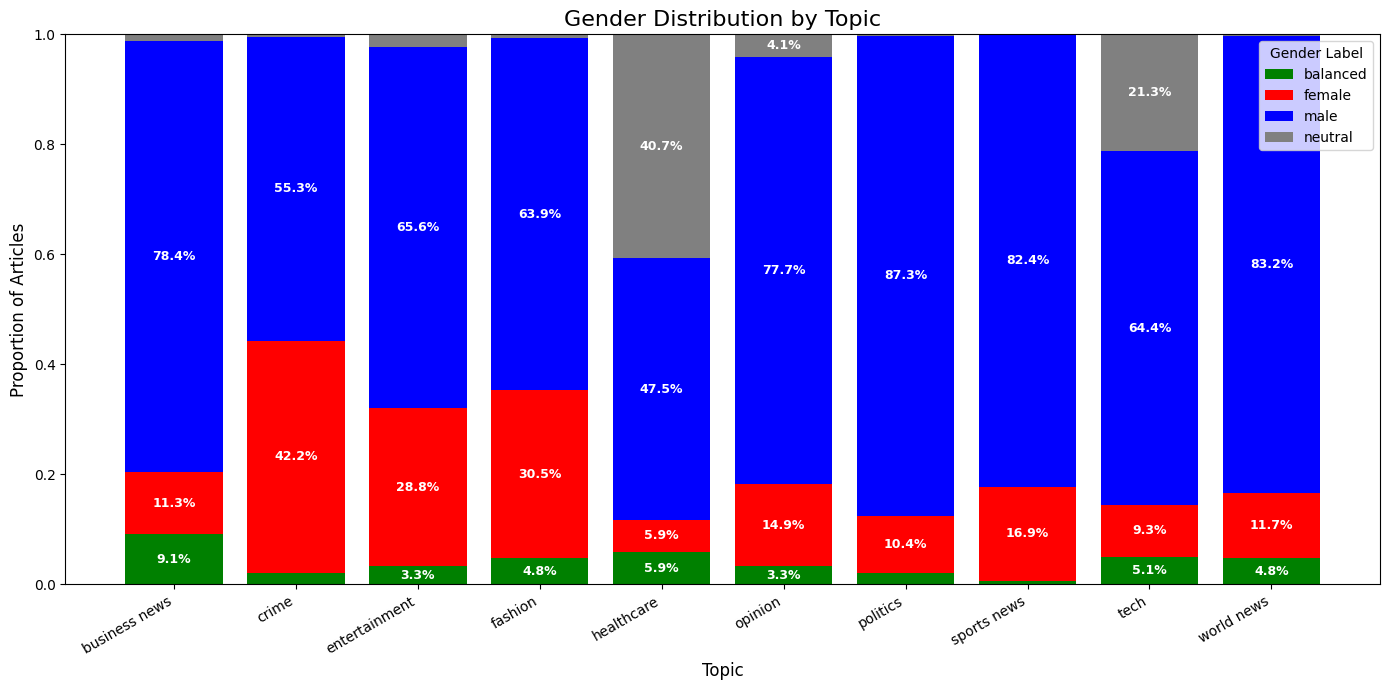

In [178]:
#gender by topic distribution

gender_by_topic = (
    df.groupby("topic")["gender_label"]
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

# Colors for each gender label
colors = {
    "male": "blue",
    "female": "red",
    "neutral": "gray",
    "balanced": "green"
}

bottom = np.zeros(len(gender_by_topic))

for gender in gender_by_topic.columns:
    values = gender_by_topic[gender].values
    bars = ax.bar(
        gender_by_topic.index,
        values,
        bottom=bottom,
        label=gender,
        color=colors.get(gender, None)
    )

    # Add percentage labels
    for i, v in enumerate(values):
        if v > 0.03:   
            ax.text(
                i,
                bottom[i] + v/2,
                f"{v*100:.1f}%",
                ha='center',
                va='center',
                fontsize=9,
                color="white",
                weight="bold"
            )
    bottom += values

ax.set_title("Gender Distribution by Topic", fontsize=16)
ax.set_ylabel("Proportion of Articles", fontsize=12)
ax.set_xlabel("Topic", fontsize=12)

plt.xticks(rotation=30, ha='right')
plt.legend(title="Gender Label")
plt.tight_layout()
plt.show()


#### Build CNN Model to predict gender label

In [180]:
#feature and label sets for model training
X = df[['article']]
y = df['gender_label']

X.head()

,article
0,Rick and Morty fans are twiddling their thumbs...
3,PARIS (Reuters) - Germany and France agree tha...
4,NEW YORK (Reuters) - A Brazilian hedge fund wa...
6,The first teaser for Tidal's upcoming TV serie...
7,Washington (CNN)Sen. Al Franken said Sunday Pr...


In [181]:
y.head()

0       male
3       male
4       male
6    neutral
7       male
Name: gender_label, dtype: object

In [182]:
#encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

num_classes = len(le.classes_)
print("Classes:", le.classes_)

Classes: ['balanced' 'female' 'male' 'neutral']


In [183]:
class_names = le.classes_
print("Class names:", class_names)

Class names: ['balanced' 'female' 'male' 'neutral']


In [184]:
X.shape

(13203, 1)

In [185]:
y_encoded.shape 

(13203,)

In [186]:
#split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.30, random_state=42
)

In [187]:
#create validation set from test set

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.50, random_state=42
)

In [188]:
print("x_train:", X_train.shape, " y_train:", y_train.shape)
print("x_val  :", X_val.shape,   " y_val  :", y_val.shape)
print("x_test :", X_test.shape,  " y_test :", y_test.shape)

x_train: (9242, 1)  y_train: (9242,)
x_val  : (1981, 1)  y_val  : (1981,)
x_test : (1980, 1)  y_test : (1980,)


In [189]:
X_train.head()

,article
11546,Craig Emery Szalai and Geoff Charles Todebush ...
13029,LONDON (Reuters) - One of Britain’s biggest pe...
7629,Democratic House impeachment managers are expe...
497,(Reuters) - National Football League Commissio...
2265,LONDON (Reuters) - British business leaders fr...


In [190]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [191]:
# Tokenize
vocab_size = 10000   # top 10k words
max_len = 300        # max tokens per article (truncate longer)

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train["article"])

#tokenize the datasets
X_train_tokenized = tokenizer.texts_to_sequences(X_train["article"])
X_val_tokenized   = tokenizer.texts_to_sequences(X_val["article"])
X_test_tokenized  = tokenizer.texts_to_sequences(X_test["article"])

# Pad sequences
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_len, padding="post", truncating="post")
X_val_padded = pad_sequences(X_val_tokenized,   maxlen=max_len, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_tokenized,  maxlen=max_len, padding="post", truncating="post")


In [192]:
X_train_padded.shape

(9242, 300)

In [193]:
embedding_dim = 50   # size of embedding vectors
vocab_size = len(tokenizer.word_index) + 1

In [194]:
#build CNN Model
CNN_Model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(max_len,)),
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, trainable=True), #embedding layer
    tf.keras.layers.Dropout(0.2), #dropout layer
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'), #convolutional layer
    tf.keras.layers.GlobalMaxPooling1D(), #max pooling
    tf.keras.layers.Dense(32, activation='relu'), #dense layer
    tf.keras.layers.Dropout(0.5), #dropout layer
    tf.keras.layers.Dense(num_classes, activation='softmax') #output layer
])

In [195]:
#compile and summary
CNN_Model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

CNN_Model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 300, 50)        │     4,852,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 300, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 296, 64)        │        16,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,871,026 (18.58 MB)

 Trainable params: 4,871,026 (18.58 MB)

 Non-trainable params: 0 (0.00 B)

In [196]:
y_train.shape

(9242,)

In [197]:
X_val_padded.shape

(1981, 300)

In [198]:
y_val.shape

(1981,)

In [199]:
from tensorflow.keras.callbacks import EarlyStopping

#stop training if val_loss doesn't improve for 2 consecutive epochs
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

In [200]:
#train the CNN model
CNN_Hist = CNN_Model.fit(X_train_padded, y_train, epochs=20, callbacks=[early_stop],
                    validation_data=(X_val_padded, y_val))

Epoch 1/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7529 - loss: 0.8054 - val_accuracy: 0.8410 - val_loss: 0.4539
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.8383 - loss: 0.4836 - val_accuracy: 0.8566 - val_loss: 0.4166
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8577 - loss: 0.4010 - val_accuracy: 0.8607 - val_loss: 0.3892
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8799 - loss: 0.3304 - val_accuracy: 0.8607 - val_loss: 0.3891
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9190 - loss: 0.2283 - val_accuracy: 0.8617 - val_loss: 0.4158
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9375 - loss: 0.1701 - val_accuracy: 0.8617 - val_loss: 0.4626


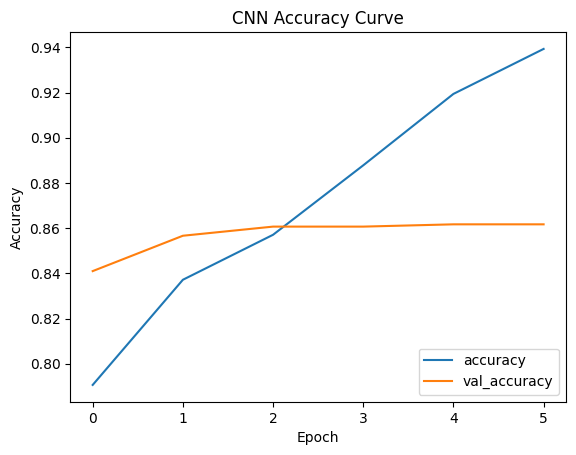

In [201]:
#CNN Accuracy Curve

plt.plot(CNN_Hist.history['accuracy'], label='accuracy')
plt.plot(CNN_Hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Curve')
plt.legend(loc='lower right')

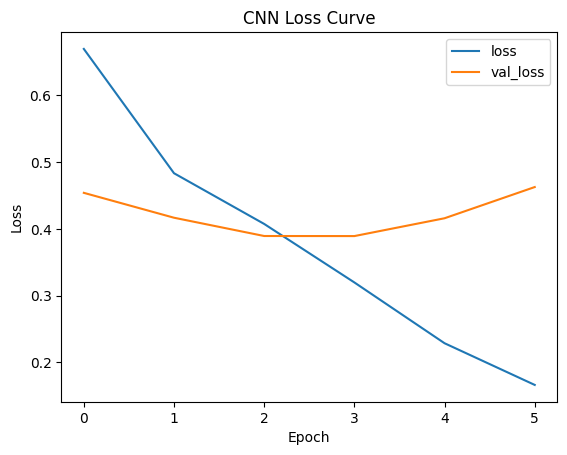

In [202]:
#CNN Loss Curve
plt.plot(CNN_Hist.history['loss'], label='loss')
plt.plot(CNN_Hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Loss Curve')
plt.legend(loc='upper right')

In [203]:
#CNN Model test on test data
CNN_test_loss, CNN_test_acc = CNN_Model.evaluate(X_test_padded, y_test)
print('\nCNN Test accuracy:', CNN_test_acc)
print('\nCNN Test loss:', CNN_test_loss)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 0.4347

CNN Test accuracy: 0.8474747538566589

CNN Test loss: 0.44396817684173584


In [204]:
y_pred_cnn = CNN_Model.predict([X_test_padded])
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


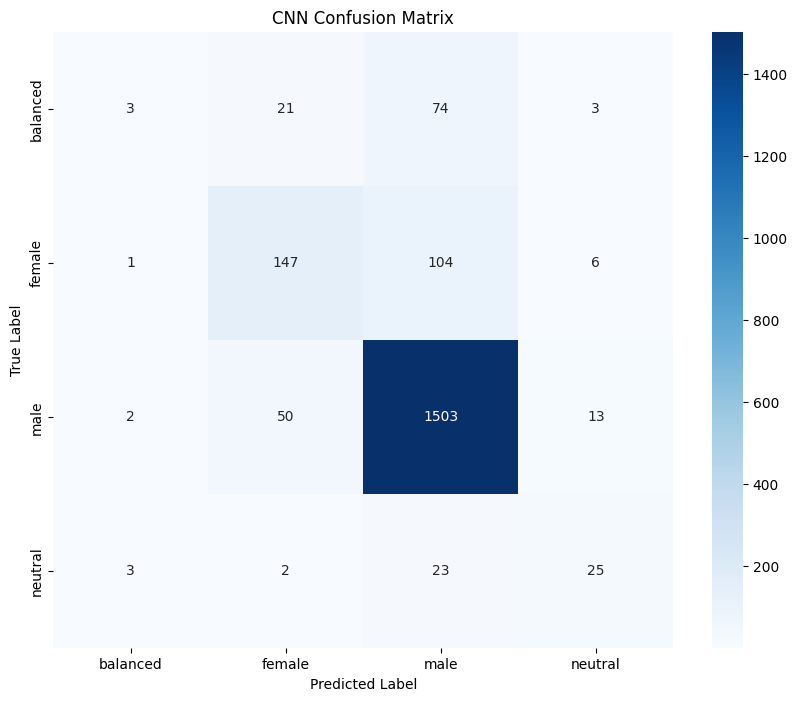

In [205]:
#CNN confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_cnn_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=class_names,
yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

In [206]:
#Look at words associated with each class using the embedding layer weights

# Get embedding matrix
embedding_layer = CNN_Model.layers[0]
embedding_matrix = embedding_layer.get_weights()[0]

embedding_matrix.shape

(97055, 50)

In [207]:
word_index = tokenizer.word_index
index_word = {v: k for k, v in word_index.items()}

In [ ]:
#So we need most frequent words that are associated with gendered language 

from numpy.linalg import norm
import numpy as np

word_index = tokenizer.word_index
word_counts = tokenizer.word_counts  # word -> frequency dict

# 1. Build a list of "good" words
min_count = 30  # you can tweak this (10, 20, 50, etc.)

candidate_words = []
candidate_indices = []

for w, idx in word_index.items():
    # skip if not in counts (shouldn't happen, but safe)
    if w not in word_counts:
        continue
    
    # frequency filter
    if word_counts[w] < min_count:
        continue
    
    # simple character filter: only alphabetic, length > 2
    if not w.isalpha():
        continue
    if len(w) <= 2:
        continue
    
    # store
    candidate_words.append(w)
    candidate_indices.append(idx)

candidate_words = np.array(candidate_words)
candidate_indices = np.array(candidate_indices)

print("Candidate vocab size:", len(candidate_words))


Candidate vocab size: 9483


In [209]:
#cosine similarity function to find similar words

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_similar_words(word, top_n=10):
    if word not in word_index:
        print(f"'{word}' not in vocabulary")
        return []

    # get the vector for the anchor word
    idx = word_index[word]
    word_vec = embedding_matrix[idx].reshape(1, -1)

    # ONLY compare against candidate vectors
    candidate_vectors = embedding_matrix[candidate_indices]

    # compute cosine similarity
    sims = cosine_similarity(word_vec, candidate_vectors)[0]

    # top N indices among the filtered candidates
    top_idx = sims.argsort()[-top_n:][::-1]

    return [(candidate_words[i], sims[i]) for i in top_idx]


In [226]:
woman_results = get_similar_words("woman", top_n=20)

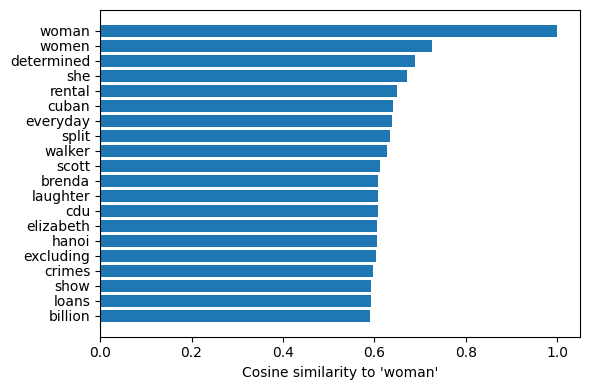

In [227]:
# split into words and similarity scores
words = [w for w, _ in woman_results]
sims = [s for _, s in woman_results]

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.barh(words, sims)
plt.xlabel("Cosine similarity to 'woman'")
plt.gca().invert_yaxis()   # highest score at top
plt.tight_layout()
plt.show()

In [228]:
man_results = get_similar_words("man", top_n=20)

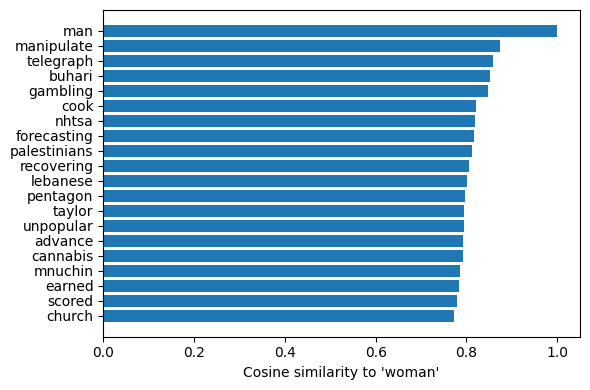

In [229]:
# split into words and similarity scores
words = [w for w, _ in man_results]
sims = [s for _, s in man_results]

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.barh(words, sims)
plt.xlabel("Cosine similarity to 'woman'")
plt.gca().invert_yaxis()   # highest score at top
plt.tight_layout()
plt.show()

In [230]:
his_results = get_similar_words("his", top_n=20)

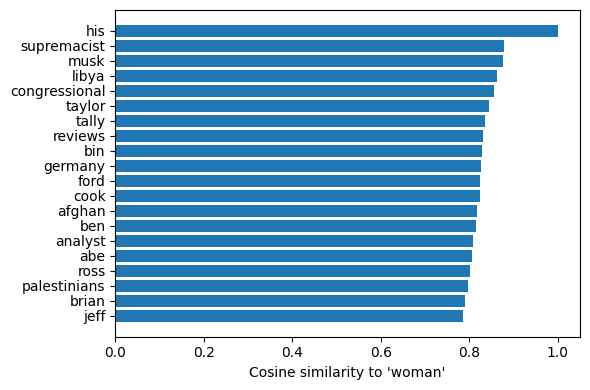

In [231]:
# split into words and similarity scores
words = [w for w, _ in his_results]
sims = [s for _, s in his_results]

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.barh(words, sims)
plt.xlabel("Cosine similarity to 'woman'")
plt.gca().invert_yaxis()   # highest score at top
plt.tight_layout()
plt.show()

In [237]:
her_results = get_similar_words("her", top_n=20)

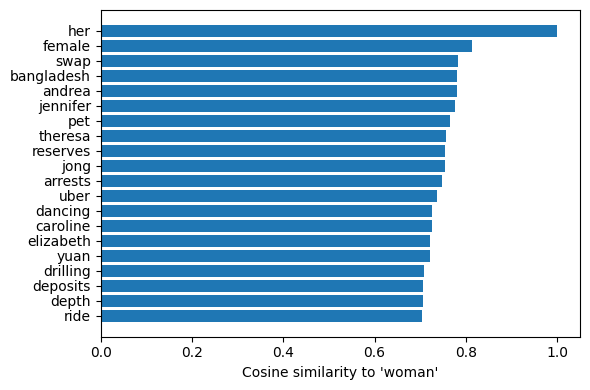

In [239]:
# split into words and similarity scores
words = [w for w, _ in her_results]
sims = [s for _, s in her_results]

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.barh(words, sims)
plt.xlabel("Cosine similarity to 'woman'")
plt.gca().invert_yaxis()   # highest score at top
plt.tight_layout()
plt.show()